In [10]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-06 00:29:33,225: Credentials are already in use. The existing account in the session will be replaced.


In [11]:
!pip install polars

In [12]:
import polars as pl

In [13]:
df = pl.DataFrame(
 {
 'Company': ['Ford','Toyota',
 'Toyota','Honda','Toyota',
 'Ford','Honda','Subaru',
 'Ford','Subaru'],
 'Model': ['F-Series','RAV4',
 'Camry','CR-V','Tacoma',
 'Explorer','Accord','CrossTrek',
            'Escape','Outback'],
 'Sales': [58283,32390,25500,18081,
 21837,19076,11619,15126,
 13272,10928]
 }
)
df

Company,Model,Sales
str,str,i64
"""Ford""","""F-Series""",58283
"""Toyota""","""RAV4""",32390
"""Toyota""","""Camry""",25500
"""Honda""","""CR-V""",18081
"""Toyota""","""Tacoma""",21837
"""Ford""","""Explorer""",19076
"""Honda""","""Accord""",11619
"""Subaru""","""CrossTrek""",15126
"""Ford""","""Escape""",13272


In [14]:
df.dtypes


[polars.datatypes.Utf8, polars.datatypes.Utf8, polars.datatypes.Int64]

In [15]:
df.columns 

['Company', 'Model', 'Sales']

In [16]:
df.rows 

<bound method DataFrame.rows of shape: (10, 3)
┌─────────┬───────────┬───────┐
│ Company ┆ Model     ┆ Sales │
│ ---     ┆ ---       ┆ ---   │
│ str     ┆ str       ┆ i64   │
╞═════════╪═══════════╪═══════╡
│ Ford    ┆ F-Series  ┆ 58283 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Toyota  ┆ RAV4      ┆ 32390 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Toyota  ┆ Camry     ┆ 25500 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Honda   ┆ CR-V      ┆ 18081 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ ...     ┆ ...       ┆ ...   │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Honda   ┆ Accord    ┆ 11619 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Subaru  ┆ CrossTrek ┆ 15126 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Ford    ┆ Escape    ┆ 13272 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ Subaru  ┆ Outback   ┆ 10928 │
└─────────┴───────────┴───────┘>

In [17]:
df.select(
 'Model'
)

Model
str
"""F-Series"""
"""RAV4"""
"""Camry"""
"""CR-V"""
"""Tacoma"""
"""Explorer"""
"""Accord"""
"""CrossTrek"""
"""Escape"""


In [18]:
df.select(
 pl.col(['Model','Sales'])
 .sort_by('Sales')
)

Model,Sales
str,i64
"""Outback""",10928
"""Accord""",11619
"""Escape""",13272
"""CrossTrek""",15126
"""CR-V""",18081
"""Explorer""",19076
"""Tacoma""",21837
"""Camry""",25500
"""RAV4""",32390


In [19]:
df.select(
 [pl.col(pl.Int64), 'Company']
)

Sales,Company
i64,str
58283,"""Ford"""
32390,"""Toyota"""
25500,"""Toyota"""
18081,"""Honda"""
21837,"""Toyota"""
19076,"""Ford"""
11619,"""Honda"""
15126,"""Subaru"""
13272,"""Ford"""


In [20]:
df.select(
 [pl.col(pl.Utf8)]
)

Company,Model
str,str
"""Ford""","""F-Series"""
"""Toyota""","""RAV4"""
"""Toyota""","""Camry"""
"""Honda""","""CR-V"""
"""Toyota""","""Tacoma"""
"""Ford""","""Explorer"""
"""Honda""","""Accord"""
"""Subaru""","""CrossTrek"""
"""Ford""","""Escape"""


In [21]:
df.row(0) # get the first row

('Ford', 'F-Series', 58283)

In [22]:
df[:2] # first 2 rows
df[[1,3]] # second and fourth row

Company,Model,Sales
str,str,i64
"""Toyota""","""RAV4""",32390
"""Honda""","""CR-V""",18081


In [23]:
df.filter(
 pl.col('Company') == 'Toyota'
)

Company,Model,Sales
str,str,i64
"""Toyota""","""RAV4""",32390
"""Toyota""","""Camry""",25500
"""Toyota""","""Tacoma""",21837


In [24]:
df.filter(
 (pl.col('Company') == 'Toyota') |
 (pl.col('Company') == 'Ford')
)

Company,Model,Sales
str,str,i64
"""Ford""","""F-Series""",58283
"""Toyota""","""RAV4""",32390
"""Toyota""","""Camry""",25500
"""Toyota""","""Tacoma""",21837
"""Ford""","""Explorer""",19076
"""Ford""","""Escape""",13272


In [25]:
df.filter(
 pl.col('Company') == 'Toyota'
).select('Model')


Model
str
"""RAV4"""
"""Camry"""
"""Tacoma"""


In [26]:
df.filter(
 pl.col('Company') == 'Toyota'
).select(['Model','Sales'])

Model,Sales
str,i64
"""RAV4""",32390
"""Camry""",25500
"""Tacoma""",21837


In [30]:
import pandas as pd
import time
start = time.time()
df = pd.read_csv('flights.csv')
df = df[(df['MONTH'] == 12) &
 (df['ORIGIN_AIRPORT'] == 'SEA') &
 (df['DESTINATION_AIRPORT'] == 'DFW')]
end = time.time()
print(end - start)
df

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


19.279643774032593


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5339849,2015,12,1,2,AA,1230,N3KSAA,SEA,DFW,5,...,538.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5339922,2015,12,1,2,AA,1228,N3AMAA,SEA,DFW,500,...,1056.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5341203,2015,12,1,2,AS,658,N302AS,SEA,DFW,640,...,1210.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5341275,2015,12,1,2,AA,1308,N3BDAA,SEA,DFW,645,...,1234.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5343046,2015,12,1,2,AA,143,N3FCAA,SEA,DFW,830,...,1425.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810434,2015,12,31,4,AA,1489,N3HTAA,SEA,DFW,1015,...,1633.0,28.0,0,0,NaN,6.0,0.0,22.0,0.0,0.0
5811917,2015,12,31,4,AA,1402,N3GEAA,SEA,DFW,1155,...,1743.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5813075,2015,12,31,4,AS,662,N469AS,SEA,DFW,1310,...,1902.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5813463,2015,12,31,4,AA,1512,N3DLAA,SEA,DFW,1340,...,1923.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import polars as pl
import time
start = time.time()
df = pl.read_csv('flights.csv').filter(
 (pl.col('MONTH') == 12) &
 (pl.col('ORIGIN_AIRPORT') == 'SEA') &
 (pl.col('DESTINATION_AIRPORT') ==
 'DFW'))
end = time.time()

In [32]:
print(end - start)
display(df)

2.0900535583496094


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1489,"""N3NAAA""","""SEA""","""DFW""",1015,1043,28,22,1105,230,220,188,1660,1613,10,1605,1623,18,0,0,null,0,0,6,12,0
2015,12,1,2,"""AA""",1402,"""N3FXAA""","""SEA""","""DFW""",1155,1147,-8,22,1209,227,228,198,1660,1727,8,1742,1735,-7,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",662,"""N315AS""","""SEA""","""DFW""",1305,1304,-1,16,1320,225,224,194,1660,1834,14,1850,1848,-2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1512,"""N3AFAA""","""SEA""","""DFW""",1340,1413,33,10,1423,230,209,193,1660,1936,6,1930,1942,12,0,0,null,null,null,null,null,null


In [33]:
import polars as pl
import time
start = time.time()
df = pl.scan_csv('flights.csv').filter(
 (pl.col('MONTH') == 12) &
 (pl.col('ORIGIN_AIRPORT') == 'SEA') &
 (pl.col('DESTINATION_AIRPORT') ==
 'DFW')).collect()
end = time.time()
print(end - start)
display(df)

3.2304301261901855


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1489,"""N3NAAA""","""SEA""","""DFW""",1015,1043,28,22,1105,230,220,188,1660,1613,10,1605,1623,18,0,0,null,0,0,6,12,0
2015,12,1,2,"""AA""",1402,"""N3FXAA""","""SEA""","""DFW""",1155,1147,-8,22,1209,227,228,198,1660,1727,8,1742,1735,-7,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",662,"""N315AS""","""SEA""","""DFW""",1305,1304,-1,16,1320,225,224,194,1660,1834,14,1850,1848,-2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1512,"""N3AFAA""","""SEA""","""DFW""",1340,1413,33,10,1423,230,209,193,1660,1936,6,1930,1942,12,0,0,null,null,null,null,null,null


In [34]:
import polars as pl
import time
start = time.time()
df = pl.read_csv('flights.csv').lazy().filter((pl.col('MONTH') == 12) & (pl.col('ORIGIN_AIRPORT') == 'SEA') & (pl.col('DESTINATION_AIRPORT') == 'DFW')).collect()
end = time.time()

print(end - start)
display(df)   

5.001882314682007


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1489,"""N3NAAA""","""SEA""","""DFW""",1015,1043,28,22,1105,230,220,188,1660,1613,10,1605,1623,18,0,0,null,0,0,6,12,0
2015,12,1,2,"""AA""",1402,"""N3FXAA""","""SEA""","""DFW""",1155,1147,-8,22,1209,227,228,198,1660,1727,8,1742,1735,-7,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",662,"""N315AS""","""SEA""","""DFW""",1305,1304,-1,16,1320,225,224,194,1660,1834,14,1850,1848,-2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1512,"""N3AFAA""","""SEA""","""DFW""",1340,1413,33,10,1423,230,209,193,1660,1936,6,1930,1942,12,0,0,null,null,null,null,null,null


In [35]:
pl.scan_csv('train.csv')

In [36]:
!pip install pydot
!pip install graphviz

In [37]:
pl.scan_csv('train.csv').collect()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [40]:
q = (
 pl.scan_csv('train.csv')
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [41]:
q.fetch(5)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true


In [42]:
q = (
 pl.scan_csv('train.csv')
 .select(['CryoSleep','Age'])
 .filter(
 pl.col('Age') > 18
 )
)

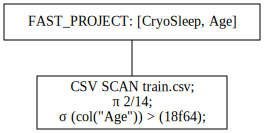

In [43]:
q.show_graph(optimized=True)

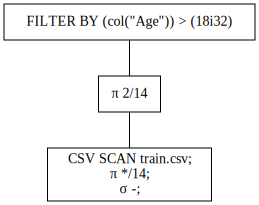

In [44]:
q.show_graph(optimized=False)

In [45]:
q.collect()

CryoSleep,Age
bool,f64
false,39.0
false,24.0
false,58.0
false,33.0
false,44.0
false,26.0
true,28.0
false,35.0
true,34.0


In [46]:
q.fetch(5)

CryoSleep,Age
bool,f64
false,39.0
false,24.0
false,58.0
false,33.0
false,44.0


In [47]:
import polars as pl
q = (
 pl.scan_csv('train.csv')
)
df = q.collect()
df

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [48]:
import polars as pl
q = (pl.scan_csv('train.csv')
     .select(
         pl.col('Cabin').is_null()
     )
    )
df = q.collect()
df

Cabin
bool
false
false
false
false
false
false
false
false
false


In [49]:
q = (
 pl.scan_csv('train.csv')
 .select(
 pl.col('Cabin').is_null().sum()
 )
)


In [50]:
q = (
 pl.scan_csv('train.csv')
)

for col in q.collect():
 print(
 f'{col.name} - {col.is_null().sum()}') 

PassengerId - 0
HomePlanet - 201
CryoSleep - 217
Cabin - 199
Destination - 182
Age - 179
VIP - 203
RoomService - 181
FoodCourt - 183
ShoppingMall - 208
Spa - 183
VRDeck - 188
Name - 200
Transported - 0


In [51]:
q = (
 pl.scan_csv('train.csv')
 .fill_null(strategy='backward')
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,0.0,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [52]:
q = (
 pl.scan_csv('train.csv')
 .fill_null(strategy='forward')
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,0.0,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [53]:
q = (
 pl.scan_csv('train.csv')
 .fill_null(1)
)
q.collect()
q.fetch(5)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true


In [54]:
q = (
 pl.scan_csv('train.csv')
 .select(
 pl.col('Cabin').fill_null(
 strategy='backward')
 )
)
q.collect()

Cabin
str
"""B/0/P"""
"""F/0/S"""
"""A/0/S"""
"""A/0/S"""
"""F/1/S"""
"""F/0/P"""
"""F/2/S"""
"""G/0/S"""
"""F/3/S"""


In [55]:
q = (
 pl.scan_csv('train.csv')
 .select(
 [
 pl.exclude('Cabin'),
 # select all columns except Cabin
 pl.col('Cabin').fill_null(
      strategy='backward')
 ]
 )
)

In [56]:
q = (
 pl.scan_csv('train.csv')
 .select(
 [
 pl.exclude('Age'),
 pl.col('Age').fill_null(
 value = 0)
 ]
 )
)

In [57]:
q = (
 pl.scan_csv('train.csv')
 .select(
 [
 pl.exclude('Age'),
 pl.col('Age').fill_null(
 value = pl.col('Age').mean())
 ]
     )
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age
str,str,bool,str,str,bool,f64,f64,f64,f64,f64,str,bool,f64
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false,39.0
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true,24.0
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false,58.0
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false,33.0
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true,16.0
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true,44.0
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true,26.0
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta...",true,28.0
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true,35.0


In [58]:
q = (
 pl.scan_csv('train.csv')
 .drop_nulls()
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true
"""0008_01""","""Europa""",true,"""B/1/P""","""55 Cancri e""",14.0,false,0.0,0.0,0.0,0.0,0.0,"""Erraiam Flatic...",true


In [59]:
q = (
 pl.scan_csv('train.csv')
 .select(
 pl.exclude('Cabin')
 )
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [60]:
# drop the Cabin column
q = (
 pl.scan_csv('train.csv')
 .drop(['Cabin'])
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [61]:
# drop the Ticket & Fare & Cabin columns 
q = (
 pl.scan_csv('train.csv')
 .drop(['Ticket','Fare','Cabin'])
 
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0006_02""","""Earth""",true,"""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta...",true
"""0007_01""","""Earth""",false,"""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [62]:
q = (
 pl.scan_csv('train.csv')
 .drop_nulls()
 .drop(['Ticket','Fare','Cabin'])
)
q.collect()

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0007_01""","""Earth""",false,"""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true
"""0008_01""","""Europa""",true,"""55 Cancri e""",14.0,false,0.0,0.0,0.0,0.0,0.0,"""Erraiam Flatic...",true


In [63]:
df = pl.read_csv('train.csv')
df.drop_in_place('Cabin')
q.collect()

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul...",false
"""0002_01""","""Earth""",false,"""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti...",true
"""0005_01""","""Earth""",false,"""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth...",true
"""0006_01""","""Earth""",false,"""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta...",true
"""0007_01""","""Earth""",false,"""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true
"""0008_01""","""Europa""",true,"""55 Cancri e""",14.0,false,0.0,0.0,0.0,0.0,0.0,"""Erraiam Flatic...",true


In [64]:
q = (
 pl.scan_csv('test_2015.csv') 
)
q.collect()

RateCodeID,RatecodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
f64,str,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,str,f64,f64,f64,str,str,f64
1.0,null,1,40.782337,-73.97216,0.0,5.0,0.3,0.5,1,2,40.789295,-73.966629,"""N""",0.0,0.0,5.8,"""2015-01-09 12:...","""2015-01-09 12:...",0.5
1.0,null,1,40.72049,-73.945465,0.5,12.5,0.3,0.5,1,1,40.72385,-73.992561,"""N""",2.0,0.0,15.8,"""2015-01-13 23:...","""2015-01-13 23:...",3.6
1.0,null,1,40.721367,-73.994781,0.0,14.5,0.3,0.5,2,2,40.7491,-73.991959,"""N""",0.0,0.0,15.3,"""2015-01-25 17:...","""2015-01-25 17:...",2.3
1.0,null,1,0.0,0.0,1.0,4.0,0.3,0.5,1,1,0.0,0.0,"""N""",1.0,0.0,6.8,"""2015-01-22 19:...","""2015-01-22 18:...",0.4
1.0,null,2,40.73711,-73.998177,0.0,4.5,0.3,0.5,1,1,40.733742,-73.990379,"""N""",1.7,0.0,7.0,"""2015-01-17 18:...","""2015-01-17 18:...",0.48
1.0,null,2,40.724499,-73.846916,1.0,17.5,0.3,0.5,1,1,40.76897,-73.862663,"""N""",3.86,0.0,23.16,"""2015-01-29 18:...","""2015-01-29 18:...",5.62
1.0,null,1,40.72303,-73.982719,0.5,5.0,0.3,0.5,1,1,40.729355,-73.989868,"""N""",1.26,0.0,7.56,"""2015-01-21 00:...","""2015-01-21 00:...",0.7
1.0,null,2,40.753906,-73.977493,0.5,4.5,0.3,0.5,3,2,40.761688,-73.975044,"""N""",0.0,0.0,5.8,"""2015-01-10 21:...","""2015-01-10 21:...",0.69
2.0,null,1,40.644909,-73.778107,0.0,52.0,0.3,0.5,2,1,40.75906,-73.986938,"""N""",11.62,5.33,69.75,"""2015-01-31 09:...","""2015-01-31 09:...",17.4


In [65]:
lf = pl.scan_csv("test_2015.csv", ignore_errors=True, parse_dates=True)
lf

In [71]:
lf = (lf.filter(
    (pl.col("dropoff_datetime") * pl.col("pickup_datatime"))
).filter(
        pl.col("trip_distance") > 1.0
))
lf

In [88]:
lf = (lf
      .groupby(["vendor_id", "payment_type"])
      .agg([
          ((pl.col("dropoff_dataset") * pl.col("pickup_datetime")).dt.seconds() / 60).mean().alias("avg_trip_duration"),
           pl.col("passenger_count")
           .max().alias("max_31_jan")
        ])
)
          
lf

In [92]:
lf = pl.scan_csv("test_2015.csv", ignore_errors=True, parse_dates=True)
lf

In [94]:
%%time
lf.collect()


CPU times: user 2.59 s, sys: 259 ms, total: 2.85 s
Wall time: 440 ms


RateCodeID,RatecodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
f64,str,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,str,f64,f64,f64,datetime[μs],datetime[μs],f64
1.0,null,1,40.782337,-73.97216,0.0,5.0,0.3,0.5,1,2,40.789295,-73.966629,"""N""",0.0,0.0,5.8,2015-01-09 12:58:40,2015-01-09 12:54:55,0.5
1.0,null,1,40.72049,-73.945465,0.5,12.5,0.3,0.5,1,1,40.72385,-73.992561,"""N""",2.0,0.0,15.8,2015-01-13 23:19:17,2015-01-13 23:09:04,3.6
1.0,null,1,40.721367,-73.994781,0.0,14.5,0.3,0.5,2,2,40.7491,-73.991959,"""N""",0.0,0.0,15.3,2015-01-25 17:37:55,2015-01-25 17:17:28,2.3
1.0,null,1,0.0,0.0,1.0,4.0,0.3,0.5,1,1,0.0,0.0,"""N""",1.0,0.0,6.8,2015-01-22 19:00:38,2015-01-22 18:57:09,0.4
1.0,null,2,40.73711,-73.998177,0.0,4.5,0.3,0.5,1,1,40.733742,-73.990379,"""N""",1.7,0.0,7.0,2015-01-17 18:16:01,2015-01-17 18:11:48,0.48
1.0,null,2,40.724499,-73.846916,1.0,17.5,0.3,0.5,1,1,40.76897,-73.862663,"""N""",3.86,0.0,23.16,2015-01-29 18:51:13,2015-01-29 18:36:44,5.62
1.0,null,1,40.72303,-73.982719,0.5,5.0,0.3,0.5,1,1,40.729355,-73.989868,"""N""",1.26,0.0,7.56,2015-01-21 00:25:28,2015-01-21 00:20:57,0.7
1.0,null,2,40.753906,-73.977493,0.5,4.5,0.3,0.5,3,2,40.761688,-73.975044,"""N""",0.0,0.0,5.8,2015-01-10 21:33:44,2015-01-10 21:30:21,0.69
2.0,null,1,40.644909,-73.778107,0.0,52.0,0.3,0.5,2,1,40.75906,-73.986938,"""N""",11.62,5.33,69.75,2015-01-31 09:45:12,2015-01-31 09:17:26,17.4


In [96]:
%%time
lf.collect(no_optimization=False)

CPU times: user 2.72 s, sys: 197 ms, total: 2.92 s
Wall time: 952 ms


RateCodeID,RatecodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
f64,str,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,str,f64,f64,f64,datetime[μs],datetime[μs],f64
1.0,null,1,40.782337,-73.97216,0.0,5.0,0.3,0.5,1,2,40.789295,-73.966629,"""N""",0.0,0.0,5.8,2015-01-09 12:58:40,2015-01-09 12:54:55,0.5
1.0,null,1,40.72049,-73.945465,0.5,12.5,0.3,0.5,1,1,40.72385,-73.992561,"""N""",2.0,0.0,15.8,2015-01-13 23:19:17,2015-01-13 23:09:04,3.6
1.0,null,1,40.721367,-73.994781,0.0,14.5,0.3,0.5,2,2,40.7491,-73.991959,"""N""",0.0,0.0,15.3,2015-01-25 17:37:55,2015-01-25 17:17:28,2.3
1.0,null,1,0.0,0.0,1.0,4.0,0.3,0.5,1,1,0.0,0.0,"""N""",1.0,0.0,6.8,2015-01-22 19:00:38,2015-01-22 18:57:09,0.4
1.0,null,2,40.73711,-73.998177,0.0,4.5,0.3,0.5,1,1,40.733742,-73.990379,"""N""",1.7,0.0,7.0,2015-01-17 18:16:01,2015-01-17 18:11:48,0.48
1.0,null,2,40.724499,-73.846916,1.0,17.5,0.3,0.5,1,1,40.76897,-73.862663,"""N""",3.86,0.0,23.16,2015-01-29 18:51:13,2015-01-29 18:36:44,5.62
1.0,null,1,40.72303,-73.982719,0.5,5.0,0.3,0.5,1,1,40.729355,-73.989868,"""N""",1.26,0.0,7.56,2015-01-21 00:25:28,2015-01-21 00:20:57,0.7
1.0,null,2,40.753906,-73.977493,0.5,4.5,0.3,0.5,3,2,40.761688,-73.975044,"""N""",0.0,0.0,5.8,2015-01-10 21:33:44,2015-01-10 21:30:21,0.69
2.0,null,1,40.644909,-73.778107,0.0,52.0,0.3,0.5,2,1,40.75906,-73.986938,"""N""",11.62,5.33,69.75,2015-01-31 09:45:12,2015-01-31 09:17:26,17.4


In [106]:
%%time
import pandas as pd
import time
start = time.time()
df = pd.read_csv('flights.csv')
df = df[(df['MONTH'] == 12) &
 (df['ORIGIN_AIRPORT'] == 'SEA') &
 (df['DESTINATION_AIRPORT'] == 'DFW')]
end = time.time()
print(end - start)
df


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/execution.py:1316: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


29.26481819152832
CPU times: user 10.4 s, sys: 17.7 s, total: 28.1 s
Wall time: 29.3 s


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5339849,2015,12,1,2,AA,1230,N3KSAA,SEA,DFW,5,...,538.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5339922,2015,12,1,2,AA,1228,N3AMAA,SEA,DFW,500,...,1056.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5341203,2015,12,1,2,AS,658,N302AS,SEA,DFW,640,...,1210.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5341275,2015,12,1,2,AA,1308,N3BDAA,SEA,DFW,645,...,1234.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5343046,2015,12,1,2,AA,143,N3FCAA,SEA,DFW,830,...,1425.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810434,2015,12,31,4,AA,1489,N3HTAA,SEA,DFW,1015,...,1633.0,28.0,0,0,NaN,6.0,0.0,22.0,0.0,0.0
5811917,2015,12,31,4,AA,1402,N3GEAA,SEA,DFW,1155,...,1743.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5813075,2015,12,31,4,AS,662,N469AS,SEA,DFW,1310,...,1902.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5813463,2015,12,31,4,AA,1512,N3DLAA,SEA,DFW,1340,...,1923.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
%%time
import polars as pl
import time
start = time.time()
df = pl.read_csv('flights.csv').filter(
 (pl.col('MONTH') == 12) &
 (pl.col('ORIGIN_AIRPORT') == 'SEA') &
 (pl.col('DESTINATION_AIRPORT') ==
 'DFW'))
end = time.time()
print(end - start)
display(df)

6.603336811065674


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1489,"""N3NAAA""","""SEA""","""DFW""",1015,1043,28,22,1105,230,220,188,1660,1613,10,1605,1623,18,0,0,null,0,0,6,12,0
2015,12,1,2,"""AA""",1402,"""N3FXAA""","""SEA""","""DFW""",1155,1147,-8,22,1209,227,228,198,1660,1727,8,1742,1735,-7,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",662,"""N315AS""","""SEA""","""DFW""",1305,1304,-1,16,1320,225,224,194,1660,1834,14,1850,1848,-2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1512,"""N3AFAA""","""SEA""","""DFW""",1340,1413,33,10,1423,230,209,193,1660,1936,6,1930,1942,12,0,0,null,null,null,null,null,null


CPU times: user 10 s, sys: 3.2 s, total: 13.2 s
Wall time: 6.64 s


In [108]:
import polars as pl
import time
start = time.time()
df = pl.read_csv('flights.csv').lazy().filter((pl.col('MONTH') == 12) & (pl.col('ORIGIN_AIRPORT') == 'SEA') & (pl.col('DESTINATION_AIRPORT') == 'DFW')).collect()
end = time.time()

print(end - start)
display(df)   

1.9783875942230225


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1489,"""N3NAAA""","""SEA""","""DFW""",1015,1043,28,22,1105,230,220,188,1660,1613,10,1605,1623,18,0,0,null,0,0,6,12,0
2015,12,1,2,"""AA""",1402,"""N3FXAA""","""SEA""","""DFW""",1155,1147,-8,22,1209,227,228,198,1660,1727,8,1742,1735,-7,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",662,"""N315AS""","""SEA""","""DFW""",1305,1304,-1,16,1320,225,224,194,1660,1834,14,1850,1848,-2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1512,"""N3AFAA""","""SEA""","""DFW""",1340,1413,33,10,1423,230,209,193,1660,1936,6,1930,1942,12,0,0,null,null,null,null,null,null
